In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as ndimage
import skimage
from skimage import exposure
from skimage import transform
from skimage import feature
from skimage import filters

# **(a) Reading and manipulating the dataset:**

## ***Part a-i:*** In this section I read in easy1 plot it along with the RGB channels and their histograms.

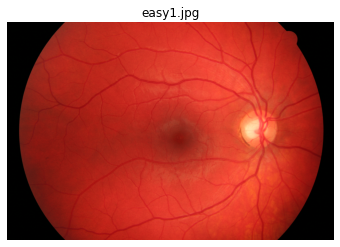

<Figure size 432x288 with 0 Axes>

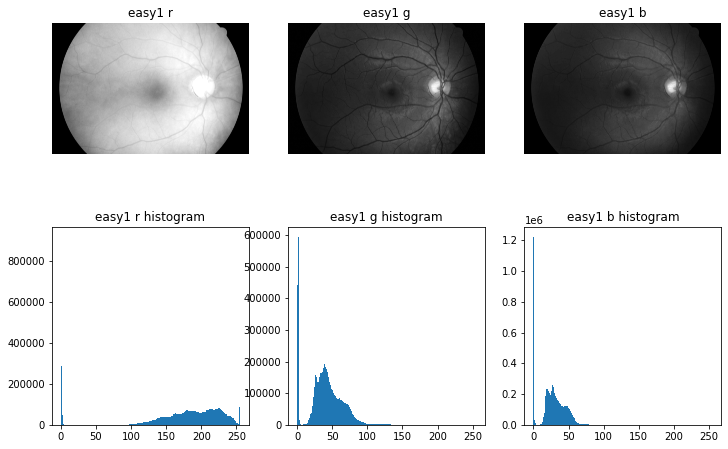

In [ ]:
easy1 = mpimg.imread("easy1.jpg")
plt.title("easy1.jpg")
img=plt.imshow((easy1).astype(np.uint8),cmap='gray'); plt.axis('off')
plt.figure()
plt.figure(figsize=(12,8))
plt.subplot(2,3,1)
easy1r = easy1[:,:,0]

hard1 = mpimg.imread("hard1.jpg").astype(float)
hard1_gt = mpimg.imread("hard1_gt.tif").astype(float)

hard1r = hard1[:,:,0]
hard1g = hard1[:,:,1]
hard1b = hard1[:,:,2]
plt.title("easy1 r")
img=plt.imshow(easy1r,cmap='gray'); plt.axis('off')

plt.subplot(2,3,2)
easy1g = easy1[:,:,1]
plt.title("easy1 g")
img=plt.imshow(easy1g,cmap='gray'); plt.axis('off')

plt.subplot(2,3,3)
easy1b = easy1[:,:,2]
plt.title("easy1 b")
img=plt.imshow(easy1b,cmap='gray'); plt.axis('off')

plt.subplot(2,3,4)
plt.title("easy1 r histogram")
_=plt.hist(easy1r.flatten(),bins=256,range=(0,255))

plt.subplot(2,3,5)
plt.title("easy1 g histogram")
_=plt.hist(easy1g.flatten(),bins=256,range=(0,255))

plt.subplot(2,3,6)
plt.title("easy1 b histogram")
_=plt.hist(easy1b.flatten(),bins=256,range=(0,255))


## ***Part a-ii:*** In this section I plot easy1_gt.tif

(-0.5, 3503.5, 2335.5, -0.5)

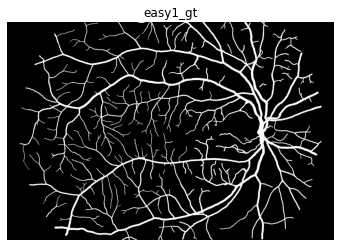

In [ ]:
plt.title("easy1_gt")
easy1_gt = mpimg.imread("easy1_gt.tif")
img=plt.imshow(easy1_gt, cmap='gray'); plt.axis('off')


## ***Part a-iii:*** In this section I take the easy1_gt and overlay it on the easy1 green channel. I did this setting all the pixels in the same location of easy1_gt to 255, and placing this in the red channel and setting all other channels to equal the orginal. 

(-0.5, 3503.5, 2335.5, -0.5)

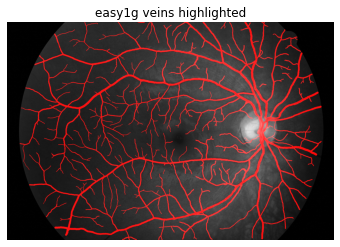

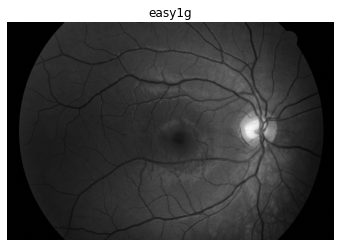

In [ ]:
easy1gh = easy1g.copy()
easy1gh = np.where(easy1_gt>0,255,easy1gh)

easy1h = np.zeros((len(easy1gh),len(easy1gh[0]),3))
easy1h[:,:,0] = easy1gh
easy1h[:,:,1] = easy1g
easy1h[:,:,2] = easy1g
plt.title("easy1g veins highlighted")
img=plt.imshow((easy1h).astype(np.uint8), cmap='gray'); plt.axis('off')
plt.figure()

plt.title("easy1g")
img=plt.imshow((easy1g).astype(np.uint8), cmap='gray'); plt.axis('off')



This looks difficult to segment due to the veins somewhat matching the background. It is hard for me to see some of the branching veins, so it will probably be even more difficult to accuratly segment them. 

## ***Part a-iv:*** In this section I highlight the optic disk. I used the dimesnions that were given in the excel sheet. I first made a circular mask based with the make circle function. I placed this circle in accordance to the info and pegged these pixels high. To make it yellow I placed it in the green and red channels.

In [ ]:
def make_circle_mask(c,im_dims,r):    
    cx = c[0]
    cy = c[1]
    ix = im_dims[0]
    iy = im_dims[1]
    x,y = np.meshgrid(np.arange(-(cx),(ix-cx),1),np.arange(-(cy),(iy-cy),1))
    c_mask = (x**2+y**2)<=r**2 


    return c_mask

(-0.5, 3503.5, 2335.5, -0.5)

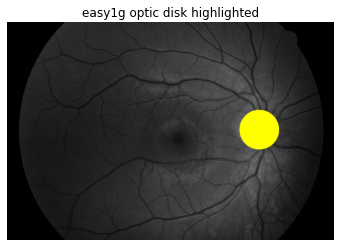

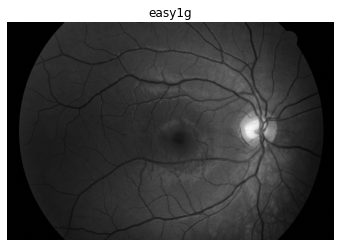

In [ ]:
diskmask = np.zeros((len(easy1gh),len(easy1gh[0])))
maske = make_circle_mask([2703,1153],[len(easy1gh[0]),len(easy1gh)],424/2)
mask_vein = easy1_gt *make_circle_mask([2703,1153],[len(easy1gh[0]),len(easy1gh)],424/2)/255


easy1gd = easy1g.copy()
easy1gb = easy1g.copy()
easy1gd = np.where(maske > 0,255,easy1gd)
easy1gb = np.where(maske > 0,0,easy1gb)


easy1d = np.zeros((len(easy1gh),len(easy1gh[0]),3))
easy1d[:,:,0] = easy1gd
easy1d[:,:,1] = easy1gd
easy1d[:,:,2] = easy1gb

plt.title("easy1g optic disk highlighted")
img=plt.imshow((easy1d).astype(np.uint8), cmap='gray'); plt.axis('off')
plt.figure()
plt.title("easy1g")
img=plt.imshow((easy1g).astype(np.uint8), cmap='gray'); plt.axis('off')

Yellow disk corresponding to the optical disk pixels. This looks difficult due to the variation in the values of the optic disk. 

# **(b) Defining the metrics:**


Part b-i: In this section I create a function to gauge the metrics of the masks. The function np.where was very useful for finding and summing the values. After I ran these through each of the metric formuals and tested it with a known matrix.

In [ ]:
def seg_metrics(I_seg,I_gt):

  TP = np.sum( np.where( ( (I_seg==1) & (I_gt==1) ) ,1,0) )
  TN = np.sum( np.where( ( (I_seg==0) & (I_gt==0) ) ,1,0) )
  FP = np.sum( np.where( ( (I_seg==1) & (I_gt==0) ) ,1,0) )
  FN = np.sum( np.where( ( (I_seg==0) & (I_gt==1) ) ,1,0) )

  TPR = TP / (TP + FN)
  TNR = TN / (TN + FP)
  FPR = FP / (TN + FP)
  FNR = FN / (TP + FN)
  return np.round(TPR,4),np.round(TNR,4),np.round(FPR,4),np.round(FNR,4)

In [ ]:
I_seg=np.zeros((10,10)); I_seg[0:3,:]=1; I_gt=np.zeros((10,10)); I_gt[2:,4:]=1;
TPR,TNR,FPR,FNR = seg_metrics(I_seg,I_gt)
print("TPR= ",TPR,",TNR= ",TNR,",FPR= ",FPR,",FNR= ",FNR)

TPR=  0.125 ,TNR=  0.5385 ,FPR=  0.4615 ,FNR=  0.875


The values came out correct.

# **(c) Segmenting the optic disk:**

## ***Part c-i:*** In this section I develope a way to segmrent the optical disk. I'm going to break it up into two different parts. The first part is my technique to come up with a mask for the final input. The next section is thresholding it to extract the disk.

Here I load all the green channels

In [ ]:
easy1 = mpimg.imread("easy1.jpg").astype(float)
easy1g = easy1[:,:,1]
easy2 = mpimg.imread("easy2.jpg").astype(float)
easy2g = easy2[:,:,1]

medium1 = mpimg.imread("medium1.jpg").astype(float)
medium1g = medium1[:,:,1]
medium2 = mpimg.imread("medium2.jpg").astype(float)
medium2g = medium2[:,:,1]

hard1 = mpimg.imread("hard1.jpg").astype(float)
hard1g = hard1[:,:,1]
hard2 = mpimg.imread("hard2.jpg").astype(float)
hard2g = hard2[:,:,1]


### ***Phase I:*** This is my code to generate a circle that will be roughly centered on the center of the disk. The first thing I did was threshold the image as a percent of the total because I know the pixels that represent the disks will be higher than the others. 99.9 turned out to be a good trade off between the amount of disk visible and the chance of the function picking the wrong center due to too many pixels in a row throwing of the sums. I then make the image binary and take the sum of each row. The row with the highest sum will more than likely be close or exactly the row that the disk is centered on. From there I decide that the halfway point between the row is a good choice for were the y should be centered becuase in an ideal case the max of the row would be the full diamter so this is where the radius would be placed. It more than likley will not be but even if it is wrong it will still be in  the general area. I chose a radius of 300 to avoid clipping values. I know from the spread sheet s diamter of 600 is much larger than any of the other radii, so I wouldn't be clipping out any of the disk values. Due to the approximatations that were made there is a chance the wrong center is pixed and the mask gets thrown off.

In [ ]:
def find_mask(Input):
  Input_intial = Input.copy

  First_thresh=np.percentile(Input,99.9)
  First_thresh = np.where(Input <=  First_thresh,0,1)

  radi = np.zeros(len(Input))
  for i in range(0, len(Input)):
    radi[i] = np.sum(First_thresh[i,:])

  row = np.zeros((len(Input),len(Input[0])))
  i = np.max( np.where(radi == np.max(radi)) )
  row[i,:]=First_thresh[i,:]
  center = np.where(row>0)
  j = int(np.min(center[1])+len(center[1])/2)
  row[:,j]=1

  Input_Thresholded = make_circle_mask([j,i],[len(Input[0]),len(Input)],300)
  return Input_Thresholded

(-0.5, 3503.5, 2335.5, -0.5)

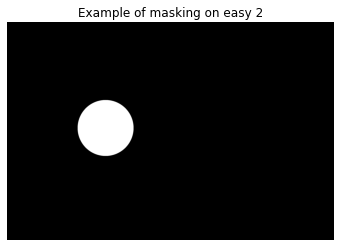

In [ ]:
I_example = find_mask(easy2g) 
plt.title("Example of masking on easy 2")

img=plt.imshow(I_example,cmap='gray'); plt.axis('off')


### ***Phase II:*** In this section I threshold the image using a couple techniques. The first thing I do was take a thershold based on a percentile of the image. The amount 70 seem like a good comprimise between including image detail for the disk while leaving out the background. Too high and not much of the disk is visible, too low and the background begins to come through. Next I used a gradient to find the image edges. I agian thershold this so that the sharper edges would show up, and my percentile of 90 seemed to work have the most consistant optic disk edges. I took the gradient with two sobel kernals. I wanted the edges because I could use them as a mask to further simplify the histogram and sperate the modes more after multiply this edge image by the orginal. In order to not throw off the statistics when calculating a threshold I create another variable that did not contian any of the zeros. I used an otsu because the global thershold wasn't producing a strong enough theshold and allowed more false pixels around the disk. With this new threshold I applied it to the first thesholded image. With this final result I multipled this image by the mask generated in phase 1. From here it is a simple matter of pegging all the pixels in this region to 255 in the red and green to make a yellow optic disk. 

In [ ]:
def optic_disk_mask(Input):
  I_thresh = Input.copy()


  thresh=np.percentile(I_thresh,70)
  i = np.where(I_thresh <=  thresh)
  j = np.where(I_thresh >=  thresh)
  I_thresh[i]=0

  sobel_horiz = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
  sobel_vert = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
  gx = ndimage.filters.convolve(I_thresh,sobel_horiz)
  gy = ndimage.filters.convolve(I_thresh,sobel_vert)
  g = np.abs(gx) + np.abs(gy)

  thresh=np.percentile(g,90)
  g = np.where(g >=  thresh,1,0)


  Mask = g*I_thresh

  i = np.where(Mask>0)
  m1 = Mask[i]

  T_ostu1 = filters.threshold_otsu(m1)

  Mask = np.where(I_thresh >=  T_ostu1,1,0)

  Final_Mask = Mask*find_mask(Input)
  return Final_Mask

## ***Part c-ii:*** in this section I print all the disk imposed over the orignal image along with the statitics. I do this in the same way as part a but made it into a function so I could input each image. I also generated the masks for each of them using a circle command with the paramters given in the spread sheet. 

In [ ]:
def highlight_disk(Image):
  i = np.where(optic_disk_mask(Image) > 0)
  disk_high = Image.copy()
  disk_low = Image.copy()

  disk_high[i]=255
  disk_low[i]=0

  disk = np.zeros((len(Image),len(Image[0]),3))
  disk[:,:,0] = disk_high
  disk[:,:,1] = disk_high
  disk[:,:,2] = disk_low
  return disk


(-0.5, 3503.5, 2335.5, -0.5)

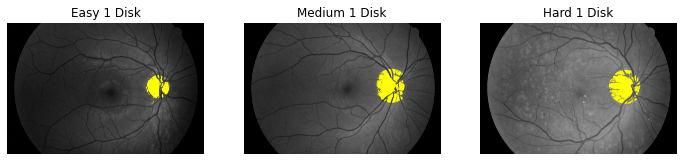

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
plt.title("Easy 1 Disk")
img=plt.imshow((highlight_disk(easy1g)).astype(np.uint8), cmap='gray'); plt.axis('off')
plt.subplot(1,3,2)
plt.title("Medium 1 Disk")
img=plt.imshow((highlight_disk(medium1g)).astype(np.uint8), cmap='gray'); plt.axis('off')
plt.subplot(1,3,3)
plt.title("Hard 1 Disk")
img=plt.imshow((highlight_disk(hard1g)).astype(np.uint8), cmap='gray'); plt.axis('off')


In [ ]:
maske = make_circle_mask([2703,1153],[len(easy1g[0]),len(easy1gh)],424/2)
maskm = make_circle_mask([2648,1155],[len(easy1g[0]),len(easy1gh)],402/2)
maskh = make_circle_mask([2695,1144],[len(easy1g[0]),len(easy1gh)],364/2)

TPR,TNR,FPR,FNR = seg_metrics(optic_disk_mask(easy1g),maske)
print("TPR= ",TPR,",TNR= ",TNR,",FPR= ",FPR,",FNR= ",FNR)
TPR,TNR,FPR,FNR = seg_metrics(optic_disk_mask(medium1g),maskm)
print("TPR= ",TPR,",TNR= ",TNR,",FPR= ",FPR,",FNR= ",FNR)
TPR,TNR,FPR,FNR = seg_metrics(optic_disk_mask(hard1g),maskh)
print("TPR= ",TPR,",TNR= ",TNR,",FPR= ",FPR,",FNR= ",FNR)

TPR=  0.6447 ,TNR=  0.9995 ,FPR=  0.0005 ,FNR=  0.3553
TPR=  0.8027 ,TNR=  0.9897 ,FPR=  0.0103 ,FNR=  0.1973
TPR=  0.6402 ,TNR=  0.9855 ,FPR=  0.0145 ,FNR=  0.3598


Visually the first one looks the best but the statistic are low compared to the others. This is most likely due to the viens causing a false read. There was no consistant way to inclue the portion that that the veins that I could generate in my own without the ground truth images.  I could subtract the veins from the mask and compare, and would get a higher TPR rate. 

## ***Part c-iii***

The performance of my disk segmentation was pretty consistant with my expectations of what the extracted disk would turn out to be. The first major flaw that I have with is is how easly it could be completely destroyed if there was a portion of highly concentrated noise that places the center no where near the actual center of the disk. I tried to make this less likely by centering it on a very tresholded version of the image so there would not be less high pixels outside the disk recentering it wrong. I am proud of how my center point algorithm turned out, and while it doesn't ever hit the true center, it gets close enough and without it my rates would be super thrown off due to the harder images having alot of non disk values outside the mask. I don't like relying on an aribtrary radius either due to it not being as universal that way, but the results are fine using this technique. 

My segmation has some false readings on them outside the disk, and I think the image could benefiet from further thresholding. The segmetation on the easeir images comes out very simular to the true disk, with the TPR mostly being thrown of by the image that is being compared not having the viens running through it. With harder images, however, the segmentation mostly relies on the masking functin to do the heavy lifting in terms of getting rid of values that were not supposed to be there. 

There are a couple advantages however. This technqiue is pretty quick, and It is easy to change a couple values around depending on the image. My masking seems to be pretty accurate in all of cases that I tried which is good. 

It seems like the more spread out the values that encompass the disk the easier it is to extract the disk. This is due to the thresholding in the end being easier with an ostu because the modes are more seperated, making the process of thersholding much more accurate with expectations. With closer values it is harder to find what is and isn't the optic disk and the my segemenation include more outside the circle.

# **(d) Segmenting the blood vessels:**

## ***Part di:*** In this section I segment the blood vessels. This process is more based on detecting edges whereas the previous one was more about detecting homogenous regions. The explaination is below.

From examining the image I got the impression that the edges in the image would give a good outline of the veins, so I decided to focus on finding the edges and then filling them in. The first step in most edge detection methods is smoothing. I did this with a averaging filter of size 9 by 9. This gets rid of some noise and small image detail that would throw off the edge detection process. I take the gradient of this smoothed image to produce an image containing the edges. The graident returned a decent approximation of the edges, but there was still many parts that were clearly not part of the vien structure. I decided on an otsu filter to get these parts of the image out of the way. At this point there is also an edge around the image due to the border so I make a mask slightly smaller than the border and mask it out. I wanted to do this now just in case the filling in I do later connects the border to the veins. To demonstrate I have printed out the tresholded g after defining the function. 

In [ ]:
def blood_vessel_seg(veins):

  w = np.ones((9,9))/(9*9)
  veins = ndimage.filters.convolve(veins,w)
  
  sobel_horiz = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
  sobel_vert = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
  gx = ndimage.filters.convolve(veins,sobel_horiz)
  gy = ndimage.filters.convolve(veins,sobel_vert)
  g = np.abs(gx) + np.abs(gy)



  T_ostu1 = filters.threshold_otsu(g)
  g = np.where(g>=T_ostu1,g,0)
  v_mask =  make_circle_mask([len(veins[0])/2,len(veins)/2],[len(Input[0]),len(Input)],1600)
  g = g*v_mask

  L = 15
  M,N = g.shape
  g_conn = np.where(g>0,1,0)
  edge_flag = 0
  counter = 0
  for m in range(M): 
    for n in range(N): 
      if (g_conn[m,n] == 1) & (edge_flag == 0): 
        edge_flag = 1 
      elif (g_conn[m,n] == 0) & (edge_flag == 1): 
        counter += 1 
      elif (g_conn[m,n] == 1) & (edge_flag == 1): 
        g_conn[m,n-counter:n] = 1 
        counter = 0 
      if counter >= L: 
        counter = 0 
        edge_flag = 0 

    counter = 0 
    edge_flag = 0   

  M,N = g.shape
  g_conn = g_conn.T
  edge_flag = 0
  counter = 0
  for m in range(N): 
    for n in range(M): 
      if (g_conn[m,n] == 1) & (edge_flag == 0): 
        edge_flag = 1 
      elif (g_conn[m,n] == 0) & (edge_flag == 1): 
        counter += 1 
      elif (g_conn[m,n] == 1) & (edge_flag == 1): 
        g_conn[m,n-counter:n] = 1 
        counter = 0 
      if counter >= L: 
        counter = 0 
        edge_flag = 0 

    counter = 0 
    edge_flag = 0   

  g_conn = g_conn.T

  return g_conn


Example

In [ ]:
veins = easy1g
w = np.ones((9,9))/(9*9)
veins = ndimage.filters.convolve(veins,w)

sobel_horiz = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
sobel_vert = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
gx = ndimage.filters.convolve(veins,sobel_horiz)
gy = ndimage.filters.convolve(veins,sobel_vert)
g = np.abs(gx) + np.abs(gy)



T_ostu1 = filters.threshold_otsu(g)
g = np.where(g>=T_ostu1,g,0)
g = g*v_mask
v_mask =  make_circle_mask([len(veins[0])/2,len(veins)/2],[len(Input[0]),len(Input)],1600)
plt.title("gradient image")
img=plt.imshow(g.astype(np.uint8), cmap='gray'); plt.axis('off')


NameError: ignored

This image has a good comprimise between including veins while reducing the total amount of noise. The optic disk edge is also present so it will likely be treated as a vien. I'll move on to filling in these edges.

To make the edges connected I turned the gradient image about to generate a binary image. I used this binary edge for two reasons. The first was that it made the edges thicker because it changes all edges to 1. The second is that the algorithm that fills in the edges need the input to be a binary image. I then took the function from homework 9 to connect the edges horizionally. I then transposed this image and filled in the lines horizoinally. I had to re-transpose for the image to return to the right dimensions.

## ***Part d-ii:*** In this section I write a function that takes the function in the previous part and produces and the binary mask image. I made it also return the mask becuase my function takes a while to process the entire image and I wanted to save time when I need it later for metrics. The basic idea is to peg all values high where the mask is high and place it in the red channel. I also define the gt images for the statistics. I plug the mask and the ground truth image into my metric function.

In [ ]:
easy1_gt = easy1 = mpimg.imread("easy1_gt.tif")
hard_gt = hard1 = mpimg.imread("hard1_gt.tif")
medium1_gt = easy1 = mpimg.imread("medium1_gt.tif")

In [ ]:
def highlight_vessels(Image):
  vessels = blood_vessel_seg(Image)
  i = np.where( vessels > 0)
  vessels_high = Image.copy()
  vessels_low = Image.copy()

  vessels_high[i]=255
  vessels_low[i]=0

  v = np.zeros((len(Image),len(Image[0]),3))
  v[:,:,0] = vessels_high
  v[:,:,1] = vessels_low
  v[:,:,2] = vessels_low
  return v, vessels


In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
v_easy , easy_vessels = highlight_vessels(easy1g)
plt.title("Easy")
img=plt.imshow(v_easy.astype(np.uint8), cmap='gray'); plt.axis('off')

plt.subplot(1,3,2)
plt.title("Medium")
v_medium , medium_vessels = highlight_vessels(medium1g)
img=plt.imshow(v_medium.astype(np.uint8), cmap='gray'); plt.axis('off')

plt.subplot(1,3,3)
plt.title("Hard")
v_hard , hard_vessels = highlight_vessels(hard1g)
img=plt.imshow(v_hard.astype(np.uint8), cmap='gray'); plt.axis('off')

print("Easy1 Statistics:")
TPR,TNR,FPR,FNR = seg_metrics(easy_vessels,easy1_gt/255)
print("TPR= ",TPR,",TNR= ",TNR,",FPR= ",FPR,",FNR= ",FNR)

print("Medium1 Statistics:")
TPR,TNR,FPR,FNR = seg_metrics(medium_vessels,medium1_gt/255)
print("TPR= ",TPR,",TNR= ",TNR,",FPR= ",FPR,",FNR= ",FNR)

print("Hard1 Statistics:")
TPR,TNR,FPR,FNR = seg_metrics(hard_vessels,hard1_gt/255)
print("TPR= ",TPR,",TNR= ",TNR,",FPR= ",FPR,",FNR= ",FNR)

## ***Part d-iii:*** In this section I dicuss the strengths and weaknesses of my vessel detection.

I am relavtivly satified with the number of vessels that appeared in the final image. While it is not all of them as the ground truth shows, the main lines and most sub vessels are present. The final image has some blank spaces in the viens, this is where the length of my line filling process was not long enough. When I increase the number larger, however, the vessels start to bleed toghter (pun intended?),so the current image is a good mix between accuray of the vessels and the amount that they are filled in. 

I'd say the main weakness of my method is the time that it takes to process the images. I scan through every picture's pixels twice, so I could benefeit from a more systematic approach to connecting the lines. Muy process also has the disadvange of detecting the optic disk as a vessel due to it having a sharp edge associated with it. 

The advantages are that the amount of small image detail that comes up as vessels is pretty low. This funciton is good for given a great idea of where the largest vessels are. It is also pretty effective all around and doesn't have too much of a drop off on harder images. 

The thing that makes the image worse I have found is the amount small image detail in the main portions of the image. This is due to these parts being picked up as edges and throwing of the segemetaiton process. For example the hard image has a lot of little edges that could potentially be picked up as vessles.